# Marginal probability

$$
p(x) = N(\bar{x}, \sigma_x) \\
p(y) = N(\bar{y}, \sigma_y)
$$
を使って周辺確率を求めてみる。

In [9]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

Prior probability P(x)=0.6, P(y)=0.4


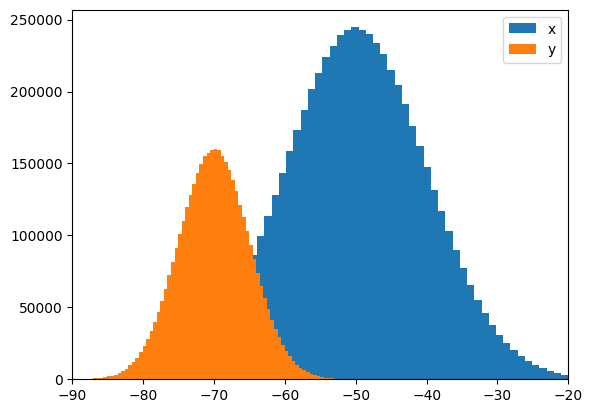

In [3]:
POINTS_X=6000000
POINTS_Y=4000000
xavg = -50
sigmax = 10
xs=np.random.normal(loc=xavg, scale=sigmax, size=POINTS_X)

yavg = -70
sigmay = 5
ys=np.random.normal(loc=yavg, scale=sigmay, size=POINTS_Y)

plt.hist(xs,bins=100, label="x")
plt.hist(ys,bins=100, label="y")
plt.legend()
plt.xlim(-90,-20)

Px = len(xs)/(len(xs) + len(ys))
Py = len(ys)/(len(xs) + len(ys))
print(f"Prior probability P(x)={round(Px,3)}, P(y)={round(Py,3)}")

x=[60,65] で値が取得できたとき、x1 である確率をヒストグラムから求めてみる。

In [7]:
x_count = np.count_nonzero((-60-0.5 <= xs) & (xs <= -60+0.5))
y_count = np.count_nonzero((-60-0.5 <= ys) & (ys <= -60+0.5))

p=x_count / (x_count + y_count)
print(f"P(z|x)={round(p,3)}")

P(z|x)=0.77


z が得られたとき、x に由来する確率密度 $f(z|x)$ と y に由来する確率密度 $f(z|y)$ は以下で表される。
$$
f(z|x)=\frac{1}{\sqrt{2 \pi \sigma^2_x}} \exp \lparen - \frac{(z-\mu_x)^2}{2 \sigma_x^2} \rparen \\
f(z|y)=\frac{1}{\sqrt{2 \pi \sigma^2_y}} \exp \lparen - \frac{(z-\mu_y)^2}{2 \sigma_y^2} \rparen
$$

ベイズの定理より、z が x に由来する確率 $P(z|x)$ は以下となる。
$$
P(z|x) = \frac{P(x) f(z|x)}{P(x) f(z|x) + P(y) f(z|y))}
$$
ここで
* $P(x)$ は x が発生する事前確率、$P(y)$ は y が発生する事前確率
* 分母 $P(x) f(z|x) + P(y) f(z|y))$ は全確率の法則による z の総確率密度


ヒストグラムと比較したいので、z = [-60.5,-59.5] が x 由来である確率を求める。

In [10]:
funx = lambda z: 1/(np.sqrt(2 * np.pi * (sigmax**2))) * np.exp(-((z - xavg)**2)/(2*sigmax**2))
funy = lambda z: 1/(np.sqrt(2 * np.pi * (sigmay**2))) * np.exp(-((z - yavg)**2)/(2*sigmay**2))
integral_fzx, _ = integrate.quad(funx, -60-0.5, -60+0.5)
integral_fzy, _ = integrate.quad(funy, -60-0.5, -60+0.5)

pzx=(Px * integral_fzx)/(Px * integral_fzx + Py * integral_fzy)
print(f"P(z|x)={round(pzx,3)}")

P(z|x)=0.77


ヒストグラムでは 0.758 だったので、近しい値が得られた。